In [1]:
"""
데이터프레임 정렬:sort_values()
튜플 정렬:sorted()
리스트 정렬:list.sort(), sorted(list)
"""

'\n데이터프레임 정렬:sort_values()\n튜플 정렬:sorted()\n리스트 정렬:list.sort(), sorted(list)\n'

In [5]:
import pandas as pd
import numpy as np

In [6]:
help(pd.DataFrame.sort_values)

Help on function sort_values in module pandas.core.frame:

sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels
    
                .. versionchanged:: 0.23.0
                   Allow specifying index or column level names.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    inplace : bool, default 

In [14]:
df=pd.DataFrame({"seq":[10,30,np.nan],
             "name":["park","kim","choi"],
             "age":[25,35,22]})
df

,seq,name,age
0,10.0,park,25
1,30.0,kim,35
2,NaN,choi,22


In [17]:
df.sort_values(by="seq", ascending=False)
df.sort_values(by="seq", ascending=False, inplace=True, na_position="first")
df

,seq,name,age
2,NaN,choi,22
1,30.0,kim,35
0,10.0,park,25


In [16]:
#df.sort(axis=1)



In [23]:
tup=[(1,"kim",25), (3,"lee",20),(2,"park",15)]
#sorted(튜플변수, 기준)
sorted(tup)#sorted(tup, key=lambda p:p[0])
sorted(tup, key=lambda p:p[0])
sorted(tup, key=lambda p:p[1])
sorted(tup, key=lambda p:p[2], reverse=True)

[(1, 'kim', 25), (3, 'lee', 20), (2, 'park', 15)]

In [29]:
myList=[0,1,2,5,4,7,8,6,3]
sorted(myList)
myList

myList.sort()
myList

sorted(myList, reverse=True)
myList

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [42]:
s1=pd.Series([3,1,4,2,5])
s1
s1[2]
s1[:3]#3,1,4출력
#열 평균값보다 큰 데이터만 추출
s1[s1>s1.mean()]
s1[[4,2]]

4    5
2    4
dtype: int64

In [43]:
s=pd.Series([10,20,30,40,50], 
            index=['a','b','c','d','e'])

In [52]:
s['a']
s[['a','c','e']]
s.get(['a','c','e'])
s['c']=300
'c' in s #s에 'c' 라벨 index가 있습니까?
'z' in s

False

In [58]:
df=pd.DataFrame({
    'c1':[1,2,3],
    'c2':[4,5,6],
    'c3':[7,8,np.nan]    
}, index=['r1','r2','r3'])
#df.info() #R언어 str()
df.index
df.columns

Index(['c1', 'c2', 'c3'], dtype='object')

In [66]:
df13=pd.DataFrame(df)
df13

df13=pd.DataFrame(df, index=['r1','r3'])
df13

dfc13= pd.DataFrame(df, columns=['c1','c3'])
dfc13
#c1과 c3열 추출 -> 데이터프레임

#r3, r1행과 c3, c1열을 추출
rfrc13=pd.DataFrame(df,index=['r3','r1'],
                    columns=['c3','c1'])
rfrc13
df[['c1','c3']]

,c1,c3
r1,1,7.0
r2,2,8.0
r3,3,NaN


In [74]:
#df['컬러명']=데이터
df['c4']=df['c1']+df['c2']
df

df=df.assign(c5=df['c1']*df['c2'])
df

df.assign(c6=lambda x:x.c1-x.c2)
#x에는 df가 전달

,c1,c2,c3,c4,c5,c6
r1,1,4,7.0,5,4,-3
r2,2,5,8.0,7,10,-3
r3,3,6,NaN,9,18,-3


In [86]:

#df.drop(), del명령:데이터프레임 컬럼 삭제
df.drop(['c2','c4','c5'],axis=1)
#c2, c4, c5열 제거

# r2 행 제거
df.drop(['r2'], axis=0)#default axis=0

del df['c2']

KeyError: "['c2'] not found in axis"

In [89]:
df
del df['c4']
df

,c1,c3,c5
r1,1,7.0,4
r2,2,8.0,10
r3,3,NaN,18


In [93]:
df
df[df['c1']<=2] #df[True, True, False]

,c1,c3,c5
r1,1,7.0,4
r2,2,8.0,10


In [94]:
col_sel=['c1','c3']
df[col_sel]

,c1,c3
r1,1,7.0
r2,2,8.0
r3,3,NaN


In [107]:
#numpy:ndarray(벡터연산)
arr1=np.array([1,2,3,4])
mylist=[5,6,7,8]
arr2=np.array(mylist)
arr1.shape
arr1.dtype

# mylist=np.asarray(mylist)
# type(mylist)

#np.asfarray(mylist)

#mylist
#mylist=[5,6,7,np.nan]
mylist=[5,6,7,np.inf]
np.asarray_chkfinite(mylist)
#배열로 변환시 무한수(inf), 
#결측값(NaN)이 있는지 확인해라

ValueError: array must not contain infs or NaNs

In [115]:
# np.zeros(5)
# np.ones(10)

# np.ones(5)*2 #벡터화 연산
np.empty(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [119]:
np.zeros((2,5))
np.ones((2,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [123]:
arr=np.arange(12)
arr=arr.reshape(3,4)

In [125]:
np.zeros_like(arr)
np.ones_like(arr)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [127]:
np.eye(3) #단위행렬(항등):대각요소 1, 나머지 0
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [135]:
np.random.normal(size=5)
#정규분포로부터 개수가 1인 무작위 샘플 추출

np.random.seed(seed=777)
np.random.normal(size=5)
np.random.normal(size=(2,5))

array([[ 0.76623673,  0.82605407, -1.32368279, -1.75244452,  1.00244907],
       [ 0.54480945,  1.8951609 , -0.76935745, -1.40309592, -0.63246751]])

In [136]:
"""
이항분포

모집단 - 확률분포 -> 분위수에 대한 확률, 특정 확률에 해당되는 분위수 계산
확률분포를 이용해서 난수를 발생

확률분포:연속형 확률 분포, 이산형 확률 분포
연속형 확률 분포:정규분포, t분포, f-분포, 균등분포
이산형 : 이항분포, 포아송, 초기하분포

이항분포? 성공확률이 p인 베르누이시행을
n번 반복했을때 성공횟수를 X라고 하면,
확률변수 X는 모수 n과 p인 이항분포를 따른다.
nCx*p의x승*(1-p)의n-x승

베르누이시행:각 시행마다 성공/실패의 경우의수만 
나오는 시행"""

'\n이항분포\n\n모집단 - 확률분포 -> 분위수에 대한 확률, 특정 확률에 해당되는 분위수 계산\n확률분포를 이용해서 난수를 발생\n\n확률분포:연속형 확률 분포, 이산형 확률 분포\n연속형 확률 분포:정규분포, t분포, f-분포, 균등분포\n이산형 : 이항분포, 포아송, 초기하분포\n\n이항분포? 성공확률이 p인 베르누이시행을\nn번 반복했을때 성공횟수를 X라고 하면,\n확률변수 X는 모수 n과 p인 이항분포를 따른다.\nnCx*p의x승*(1-p)의n-x승\n\n베르누이시행:각 시행마다 성공/실패의 경우의수만 \n나오는 시행'

In [138]:
np.random.binomial(n=1, p=0.5, size=20)

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [146]:
#numpy:boolean,int8,float,string
#숫자형/문자형

x=np.array([3,2,4,5])
x.dtype #dtype('int32')

x=np.array([3.1,2.5,4.1,5.2])
x.dtype #dtype('float64')

x=np.array([3.1,2.5,4.1,5.2],dtype=np.int32)
x.dtype #dtype
x

x=np.int32([1.5,2.4])
x


array([1, 2])

In [150]:
#데이터 타입 변환
#데이터.astype(변환타입)
x
x.astype(np.float64)
x.dtype

dtype('int32')

In [157]:
x=np.float64([3,2,1])
x
#int64로 변경
x=x.astype(np.int64)

x=x.astype(np.string_)
x.dtype

dtype('S21')

In [158]:
#두 배열의 차원이 같아야 연산
#차원이 다르면 broadcasting을 통해 차원을 동일하게..
x=np.array([1.,1.,2.,2.])
y=np.array([1.,2.,3.,4.])

In [164]:
y+1
#배열+스칼라
y/2
y//2
y%2
y**2

array([ 1.,  4.,  9., 16.])

In [165]:
a=np.arange(1000000)
a

array([     0,      1,      2, ..., 999997, 999998, 999999])

In [166]:
%timeit a+1

2.53 ms ± 85.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [167]:
%timeit [i+1 for i in a]

422 ms ± 22.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [176]:
print(x)
print(y)
x+y #element wise sum
x-y
x*y
x/y
x//y
x%y
x**y

[1. 1. 2. 2.]
[1. 2. 3. 4.]


array([ 1.,  1.,  8., 16.])

In [186]:
x
y
np.equal(x,y)
np.not_equal(x,y)

np.greater(x,y) #x>y
np.greater_equal(x,y) #x>=y

np.less(x,y) #x<y
np.less_equal(x,y) #x<=y

#배열 전체 비교
np.array_equal(x,y)
np.array_equal(x,x)


True

In [189]:
x
y
x+=y #x-=y x*=y x/=y x**=y
x

array([2., 3., 5., 6.])

In [190]:
x

array([2., 3., 5., 6.])

In [193]:
x=np.array([1,1,0,0])
y=np.array([1,0,1,0])
np.logical_and(x,y)
np.logical_or(x,y)
np.logical_xor(x,y)

array([False,  True,  True, False])

In [194]:
#소속 여부 확인?  in, not in
#객체 in 배열 : 배열에 객체가 있으면 True
a="x"
b=np.array(["x","y"])

In [196]:
a in b #True
"z" not in b

True

In [201]:
x=np.array([1.,1.,2.,2.])
y=np.arange(5)
#x+y 에러: 두 배열간 차원이 같아야 연산 가능


In [203]:
ar=np.array([1,2,3,4])
ar.shape  #     +
ar+1 #   1=> 1 1 1 1  => [2 3 4 5]

array([2, 3, 4, 5])

In [205]:
df=pd.DataFrame({'x1':[1,2,3], 'x2':[4,5,6]})
df
df+1
"""
1 1
1 1
1 1
"""


,x1,x2
0,2,5
1,3,6
2,4,7


In [211]:
ar=np.arange(12).reshape(4,3)
print(ar)
ar2=np.array([1,2,3])
print(ar2)
print(ar+ar2)

# [1,2,3]
# =>
# [[1,2,3]
# [1,2,3]
# [1,2,3]
# [1,2,3]]

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[1 2 3]
[[ 1  3  5]
 [ 4  6  8]
 [ 7  9 11]
 [10 12 14]]


In [215]:
ar=np.arange(12).reshape(4,3)
print(ar)

ar2=np.array([1,2,3,4]).reshape(4,1)
print(ar2)
print(ar+ar2)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[1]
 [2]
 [3]
 [4]]
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]
 [13 14 15]]


In [219]:
train=pd.read_csv("train.csv")
#EDA(Exploratory data analysis)
train.head(80)
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [223]:
train.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

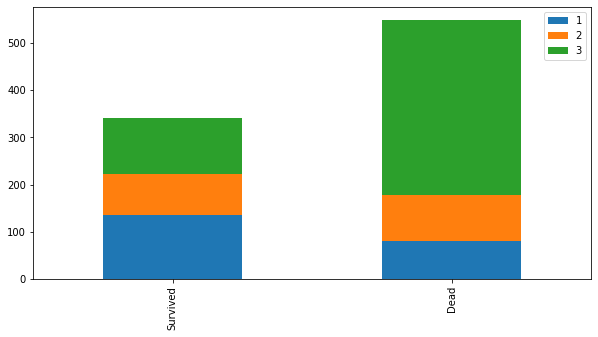

In [240]:
survived=train[train['Survived']==1]['Pclass'].value_counts()
dead=train[train['Survived']==0]['Pclass'].value_counts()
#type(dead)
df=pd.DataFrame([survived, dead])
df.index=['Survived', 'Dead']
df
import matplotlib.pyplot as plt
df.plot(kind="bar", stacked=True,figsize=(10,5))

In [242]:
def my_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index=['Survived', 'Dead']
    df.plot(kind="bar", stacked=True,figsize=(10,5))

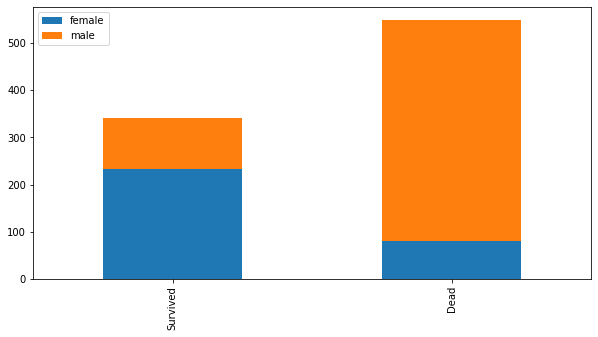

In [243]:
my_chart('Sex')

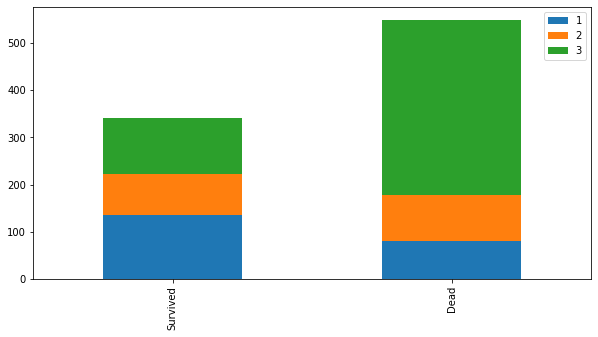

In [244]:
my_chart('Pclass')

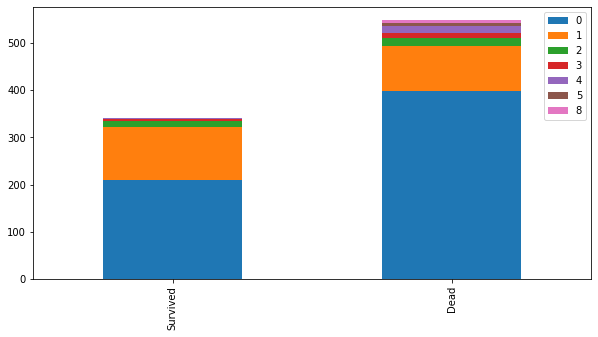

In [246]:
my_chart('SibSp')

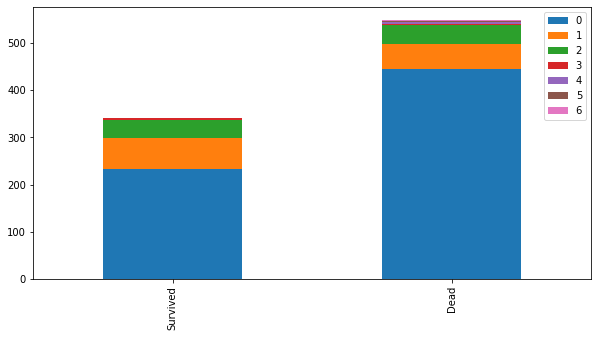

In [247]:
my_chart('Parch')

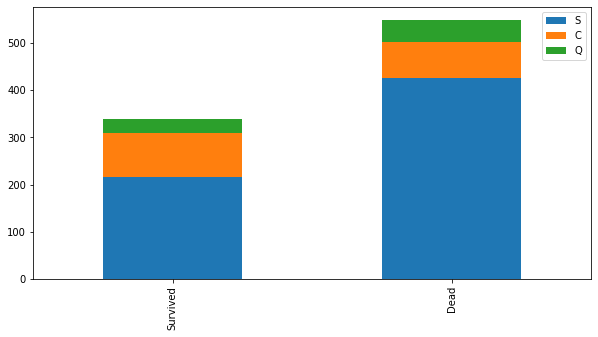

In [248]:
my_chart('Embarked')